In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import requests
import json
import seaborn as sns
import re
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
import sklearn
%matplotlib inline
import pandas
import numpy
from sklearn.metrics import accuracy_score


In [32]:
pd.set_option('display.max_rows', 10)
pd.set_option('display.max_columns', 10)

In [33]:
def build_dateframe(file):
    """This function will create Pandas DataFrame"""
    df = pd.read_csv(file)
    return df


def draw_histogram(dataframe):
    """create histogram for dataframe passed"""
    dataframe.isna().sum().plot(kind='bar')
    plt.show()


def type_categorization(df1, df2):
    """create histogram to categorize types of two dataframes"""
    df1['type'].hist(bins=80, alpha=0.8)
    df2['type'].hist(bins=80, alpha=0.8)
    plt.legend(['Disney_Plus', 'Hulu'])
    plt.show()

def missing_values_check(dataframe):
    """This will check missing values within dataframe"""
    movie_missing = dataframe.isnull().sum()
    return movie_missing


def count_entries(file_name, chunk_size, colname):
    """ This will return a dictionary with counts of occurrences as value for key"""
    counts_dict = {}
    for chunk in pd.read_csv(file_name, chunksize=chunk_size):
        for entry in chunk[colname]:
            if entry in counts_dict.keys():
                counts_dict[entry] += 1
            else:
                counts_dict[entry] = 1
    return counts_dict



In [34]:
# loading data from csv file
df_disney_plus= build_dateframe('C:/Users/Swara/UCD Assessment/disney_plus_titles.csv')
df_hulu = build_dateframe('C:/Users/Swara/UCD Assessment/hulu_titles.csv')


In [35]:
# Code to demonstrate basic operations on pandas dataframe like find missing & duplicate

disney_missing = missing_values_check(df_disney_plus)
hulu_missing = missing_values_check(df_hulu)
print('Display Missing Values - Disney Plus: ',  disney_missing)
print('Display Missing Values - Hulu : ', hulu_missing)
disney_dups = df_disney_plus.duplicated(subset=['title'], keep=False)
print(df_disney_plus[disney_dups])
hulu_dups = df_hulu.duplicated(subset=['title'], keep=False)
print(df_hulu[hulu_dups])


Display Missing Values - Disney Plus:  show_id           0
type              0
title             0
director        473
cast            190
               ... 
release_year      0
rating            3
duration          0
listed_in         0
description       0
Length: 12, dtype: int64
Display Missing Values - Hulu :  show_id            0
type               0
title              0
director        3070
cast            3073
                ... 
release_year       0
rating           520
duration         479
listed_in          0
description        4
Length: 12, dtype: int64
Empty DataFrame
Columns: [show_id, type, title, director, cast, country, date_added, release_year, rating, duration, listed_in, description]
Index: []

[0 rows x 12 columns]
Empty DataFrame
Columns: [show_id, type, title, director, cast, country, date_added, release_year, rating, duration, listed_in, description]
Index: []

[0 rows x 12 columns]


In [36]:
# Merging dataframes and removing duplicates

df_merge = pd.concat([df_disney_plus, df_hulu])
print(df_merge.info())
duplicates_combined = df_merge.duplicated(subset=['title'], keep=False)
print(df_merge[duplicates_combined].info())
#Drop duplicates
distinct_movies = df_merge.drop_duplicates(subset=['title','director','cast'])
print(distinct_movies.info())



<class 'pandas.core.frame.DataFrame'>
Int64Index: 4523 entries, 0 to 3072
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       4523 non-null   object
 1   type          4523 non-null   object
 2   title         4523 non-null   object
 3   director      980 non-null    object
 4   cast          1260 non-null   object
 5   country       2851 non-null   object
 6   date_added    4492 non-null   object
 7   release_year  4523 non-null   int64 
 8   rating        4000 non-null   object
 9   duration      4044 non-null   object
 10  listed_in     4523 non-null   object
 11  description   4519 non-null   object
dtypes: int64(1), object(11)
memory usage: 459.4+ KB
None
<class 'pandas.core.frame.DataFrame'>
Int64Index: 64 entries, 2 to 2755
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       64 non-null     object
 1   type       

In [37]:
# Code to demonstrate creating function, dictionary, using iterators

result_counts = count_entries('C:/Users/Swara/UCD Assessment/disney_plus_titles.csv', 10, 'release_year')
print(result_counts)


{2016: 61, 1988: 6, 2011: 52, 2021: 125, 2015: 46, 2019: 99, 2008: 33, 2020: 114, 2007: 23, 2013: 32, 2018: 65, 2014: 50, 2012: 41, 2006: 32, 2010: 39, 1996: 17, 2009: 35, 2017: 69, 1993: 14, 1994: 14, 1998: 20, 1989: 7, 1997: 17, 2005: 32, 2000: 26, 2004: 28, 1987: 6, 1985: 8, 1967: 2, 1973: 2, 1991: 6, 1956: 4, 1995: 13, 1984: 4, 1974: 4, 1959: 5, 2003: 29, 1976: 4, 2001: 18, 1990: 5, 1992: 10, 1952: 8, 1955: 9, 1977: 6, 1957: 4, 1999: 22, 1948: 5, 1964: 3, 1969: 4, 1942: 6, 1950: 6, 1951: 4, 1953: 6, 1949: 5, 1940: 7, 1946: 2, 1954: 4, 1936: 6, 1944: 1, 1935: 4, 1939: 5, 1975: 4, 1978: 4, 2002: 21, 1971: 3, 1961: 5, 1962: 3, 1981: 3, 1932: 3, 1938: 5, 1941: 7, 1986: 7, 1947: 5, 1937: 6, 1966: 2, 1943: 2, 1934: 4, 1980: 4, 1960: 3, 1983: 2, 1972: 3, 1982: 2, 1979: 5, 1928: 1, 1965: 3, 1970: 1, 1963: 3, 1933: 3, 1945: 1, 1968: 1}


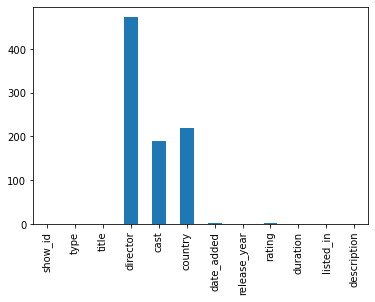

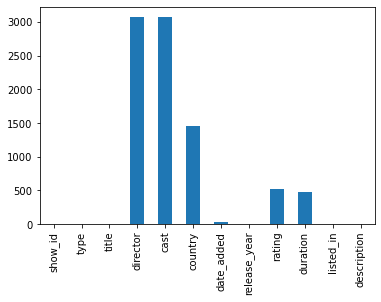

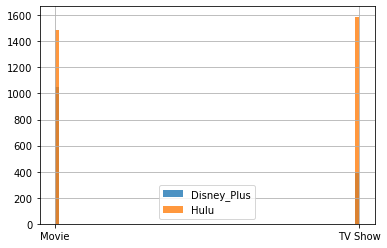

In [38]:
# histogram for two dataframe

draw_histogram(df_disney_plus)
draw_histogram(df_hulu)

# Compare type of each dat set(TV,Movie Show)

type_categorization(df_disney_plus, df_hulu)



In [39]:
# Code to demonstrate loading data from API
response_API = requests.get('https://api.covid19india.org/state_district_wise.json')
#print(response_API.status_code)
data = response_API.text
parse_json = json.loads(data)
active_case = parse_json['Andaman and Nicobar Islands']['districtData']['South Andaman']['active']
print("Active cases in South Andaman:", active_case)

Active cases in South Andaman: 19


In [40]:
df_tweets = build_dateframe('C:/Users/Swara/UCD Assessment/Tweets.csv')
hash_tags = []
regex = r"#\b\w\w+\b"
for i in df_tweets['text']:
    word = re.findall(regex, i)
    if len(word) > 0:
        hash_tags.append(word)
print(hash_tags)

[['#fabulous', '#Seductive', '#stress'], ['#29DaysToGo'], ['#fail'], ['#VX358', '#noair', '#worstflightever', '#roasted', '#SFOtoBOS'], ['#sendambien', '#andchexmix'], ['#MoodlitMonday', '#ScienceBehindTheExperience'], ['#MoodlitMonday'], ['#travelhelp'], ['#elevategold'], ['#tribute', '#SoundOfMusic', '#Oscars2015'], ['#guiltypleasures'], ['#CarrieUnderwood'], ['#CMFat35000feet'], ['#neverflyvirginforbusiness'], ['#inflight', '#flightattendant', '#dreampath'], ['#neverflyvirginforbusiness'], ['#neverflyvirgin'], ['#change'], ['#nomorevirgin'], ['#uncomfortable'], ['#sfo2lax'], ['#sneaky'], ['#customerservice', '#virginamerica', '#flying'], ['#sarcasm'], ['#CheapFlights', '#FareCompare'], ['#CheapFlights', '#FareCompare'], ['#CheapFlights', '#FareCompare'], ['#CheapFlights', '#FareCompare'], ['#PHL', '#pleasecomeback'], ['#VAbeatsJblue'], ['#Oscars2015'], ['#likingyoulessandless'], ['#Oscars', '#redcarpet', '#oscars', '#oscars2015'], ['#frustrated'], ['#lame'], ['#irmafromDallas'], ['#

In [41]:
# Code to demonstrate regular expression in python, Extracting all hash tags from Tweets
Tweet= pandas.read_csv("C:/Users/Swara/UCD Assessment/Tweets.csv")
Tweet.head()


,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,...,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,570306133677760513,neutral,1.0000,NaN,NaN,...,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
1,570301130888122368,positive,0.3486,NaN,0.0000,...,@VirginAmerica plus you've added commercials t...,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
2,570301083672813571,neutral,0.6837,NaN,NaN,...,@VirginAmerica I didn't today... Must mean I n...,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,...,@VirginAmerica it's really aggressive to blast...,NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,...,@VirginAmerica and it's a really big bad thing...,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada)


In [42]:
(len(Tweet)-Tweet.count())/len(Tweet)

tweet_id                        0.000000
airline_sentiment               0.000000
airline_sentiment_confidence    0.000000
negativereason                  0.373087
negativereason_confidence       0.281284
                                  ...   
text                            0.000000
tweet_coord                     0.930396
tweet_created                   0.000000
tweet_location                  0.323292
user_timezone                   0.329235
Length: 15, dtype: float64

In [43]:
del Tweet['tweet_coord']
del Tweet['airline_sentiment_gold']
del Tweet['negativereason_gold']

In [44]:
Mood_count=Tweet['airline_sentiment'].value_counts()

Text(0.5, 1.0, 'Count of Moods')

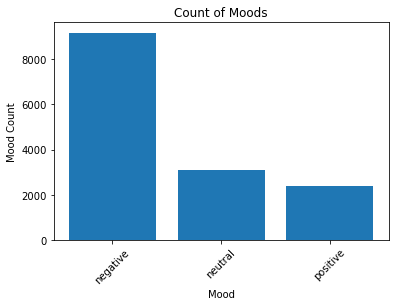

In [45]:
Index = [1,2,3]
plt.bar(Index,Mood_count)
plt.xticks(Index,['negative','neutral','positive'],rotation=45)
plt.ylabel('Mood Count')
plt.xlabel('Mood')
plt.title('Count of Moods')

In [46]:
#Machine Learnig Code snippet
#Load Data
df = pd.read_csv("C:/Users/Swara/UCD Assessment/heart.csv")
df.shape
df.head()


,age,sex,cp,trestbps,chol,...,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,...,2.3,0,0,1,1
1,37,1,2,130,250,...,3.5,0,0,2,1
2,41,0,1,130,204,...,1.4,2,0,2,1
3,56,1,1,120,236,...,0.8,2,0,2,1
4,57,0,0,120,354,...,0.6,2,0,2,1


In [47]:
#how many class of one feature or target
df["target"].value_counts()

1    165
0    138
Name: target, dtype: int64

<AxesSubplot:>

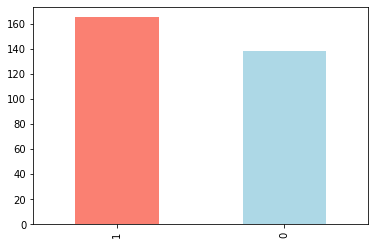

In [48]:
#bar chart
df["target"].value_counts().plot(kind='bar', color=["salmon","lightblue"])

In [49]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [50]:
#check missing values of all features
df.isna().sum()
df.describe()
#Heart Disease Frequency according to Sex
df.sex.value_counts()
#Compare target and sex column
pd.crosstab(df.target, df.sex)



sex,0,1
target,,
0,24,114
1,72,93


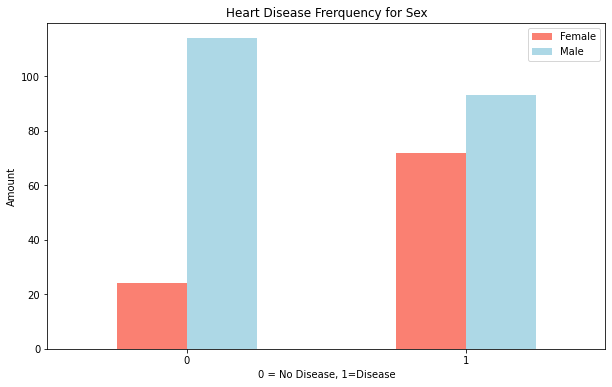

In [51]:
#Create plot of crosstab
pd.crosstab(df.target, df.sex).plot(kind="bar",figsize=(10,6),color=["salmon","lightblue"])
plt.title("Heart Disease Frerquency for Sex")
plt.xlabel("0 = No Disease, 1=Disease")
plt.ylabel("Amount")
plt.legend(["Female","Male"]);
plt.xticks(rotation=0);

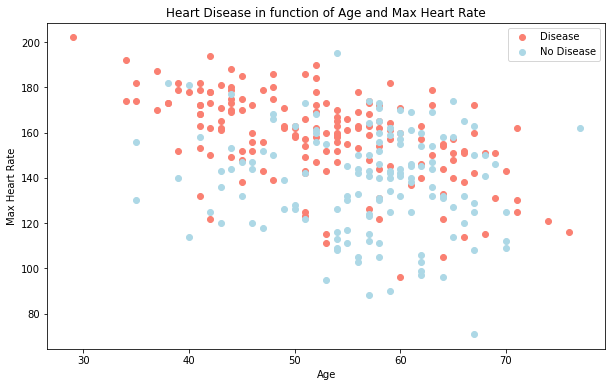

In [52]:
#Create new figure
plt.figure(figsize=(10,6))

#Scatter with positive examples
plt.scatter(df.age[df.target==1],
           df.thalach[df.target==1],
           c="salmon")

#Scatter with negative examples
plt.scatter(df.age[df.target==0],
           df.thalach[df.target==0],
           c="lightblue");

#Add some helpful info
plt.title("Heart Disease in function of Age and Max Heart Rate")
plt.xlabel("Age")
plt.ylabel("Max Heart Rate")
plt.legend(["Disease","No Disease"])

<AxesSubplot:ylabel='Frequency'>

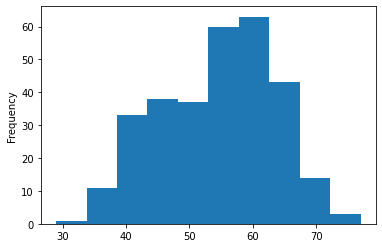

In [53]:
#Check the distribution of the age column with a histogram
#May check for outliers of the data
df.age.plot.hist()

In [54]:
#Create a hyperparameter grid for LR
log_reg_grid = {"C": np.logspace(-4,4,20),
                "solver": ["liblinear"]}

#Create a hyperparameter grid for RF
rf_grid = {"n_estimators": np.arange(10,1000,50),
          "max_depth": [None,3,5,10],
          "min_samples_split": np.arange(2,20,2),
          "min_samples_leaf": np.arange(1,20,2)}

In [55]:
#Split data into X and y for training features and target variable
X=df.drop("target",axis=1)
y=df["target"]

np.random.seed(42)
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)

# Setup random hyperparameter search for LogisticRegression
rs_log_reg = RandomizedSearchCV(LogisticRegression(),
                                param_distributions=log_reg_grid,
                                cv=5,
                                n_iter=20,
                                verbose=True)

# Fit random hyperparameter search model for LogisticRegression
rs_log_reg.fit(X_train, y_train)
print('Best Params :- ', end='')

Fitting 5 folds for each of 20 candidates, totalling 100 fits
Best Params :- 